# ED 
This notebook shows the ED method involving direct product to construct the Hamiltonian. The result of spin-1/2 chain and spin-1 chain are shown. Both cases are with open boundry conditions.

In [1]:
import numpy as np
from scipy.sparse import csr_matrix, identity, kron
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [2]:
def Parameter(spin):
    global J,hx,hz,Lx,Ly,L
    
    spin = spin
    J=[1,1,1] # z,x,y
    
    hx=0
    hz=0
    
    Lx=8
    Ly=1
    
    L=Lx*Ly
    

In [3]:
def GetSpinOp(spin):
    '''
    Given a spin quantum number
    return various spin operators and one site H
    '''
    Jp = lambda j,m: np.sqrt(j*(j+1)-m*(m+1))
    Jm = lambda j,m: np.sqrt(j*(j+1)-m*(m-1))
    
    Mdim = int(2*spin+1)
    
    Id = np.eye(Mdim)
    Sz = np.zeros((Mdim,Mdim))
    Sp = np.zeros((Mdim,Mdim))
    Sm = np.zeros((Mdim,Mdim))
    
    for ii in range(Mdim):
        sm = spin-ii
        Sz[ii,ii]= sm
        if ii > 0:
            Sp[ii-1,ii]=Jp(spin,sm)
        if ii < 2*spin:
            Sm[ii+1,ii]=Jm(spin,sm)
    Sx = (Sp+Sm)/2
    Sy = (Sp-Sm)/(2j)
    
    H1 = np.zeros((Mdim,Mdim))
    
    return Sx,Sy,Sz,Id

In [4]:
def directprod(S,i,L,Id):
    SP=S
    for si in range(L):
        if si<i:
            SP=kron(SP,Id)
        elif si>i:
            SP=kron(Id,SP)
    return SP

In [5]:
def directprod_2site(S1,i1,S2,i2,L,Id):
    SP=1
    for si in range(L):
        if si==i1:
            SP=kron(S1,SP)
        elif si==i2:
            SP=kron(S2,SP)
        else:
            SP=kron(Id,SP)
    return SP

In [6]:
def Run_ED(spin):
    global H
    Parameter(spin)
    Sx,Sy,Sz,Id = GetSpinOp(spin)
    J1x = J[1]
    J1y = J[2]
    J1z = J[0]
    for i in range(L):
        if i==0:
            H=J1x*directprod_2site(Sx,i,Sx,i+1,L,Id)\
            +J1y*directprod_2site(Sy,i,Sy,i+1,L,Id)\
            +J1z*directprod_2site(Sz,i,Sz,i+1,L,Id)
            Mz=directprod(Sz,i,L,Id)
        elif i>0 and i<L-1:
            H=H+J1x*directprod_2site(Sx,i,Sx,i+1,L,Id)\
            +J1y*directprod_2site(Sy,i,Sy,i+1,L,Id)\
            +J1z*directprod_2site(Sz,i,Sz,i+1,L,Id)
            Mz=Mz+directprod(Sz,i,L,Id)
        else:
            Mz=Mz+directprod(Sz,i,L,Id)
        #magnetic field
        H = H+hx*directprod(Sx,i,L,Id)\
        +hz*directprod(Sz,i,L,Id)
    
    #Mdim = int(2*spin+1)
    #Num = Mdim**L
    val, vec = eigsh(H, k=50, which='SA', return_eigenvectors=True) # k is the number of eigenstates we want to keep
    E = val
    
    return E/L,vec

## Spin-1/2 chain

In [7]:
energy,vec = Run_ED(1/2)
energy_level =np.sort(energy)
print('Ground state E:',energy_level[0])

Ground state E: -0.4218665748359912


Text(0.5, 1.0, 'Energy Level of Spin Chain')

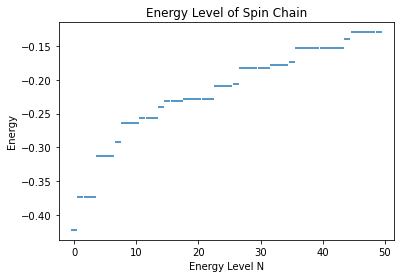

In [8]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

## Spin-1 chain

In [9]:
energy,vec = Run_ED(1)
energy_level =np.sort(energy)
print('Ground state E:',energy_level[0])


Ground state E: -1.2655796527949057


Text(0.5, 1.0, 'Energy Level of Spin Chain')

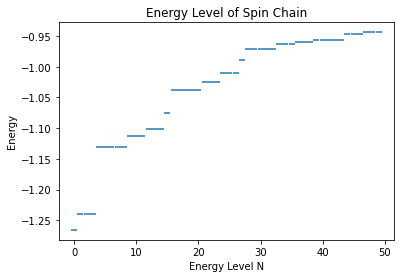

In [10]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')